In [206]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import randn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [118]:
df=pd.read_excel(r'C:\Internship\Customer_retention_dataset\Customer_retention_dataset\customer_retention_dataset.xlsx',sheet_name='codedsheet')
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,Solan,173212,2,1,3,1,4,2,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,1,3,Ghaziabad,201008,2,4,3,1,5,2,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,1,4,Bangalore,560010,3,1,3,2,5,1,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,1,1,Solan,173229,3,1,2,1,4,2,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [119]:
df.shape

(269, 71)

In [120]:
df.size

19099

In [121]:
df.describe()

,1Gender of respondent,2 How old are you?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,...,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.669145,2.959108,220465.747212,3.524164,2.672862,3.260223,1.676580,4.282528,1.776952,1.275093,...,4.182156,4.148699,4.349442,4.263941,3.914498,3.553903,3.223048,3.501859,3.282528,4.163569
std,0.471398,1.066012,140524.341051,1.436586,1.651788,1.135887,0.843904,0.923426,0.797892,0.645429,...,1.072162,0.842110,0.755953,1.000485,0.693879,1.065869,1.219581,1.141564,1.178995,0.648773
min,0.000000,1.000000,110008.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,0.000000,2.000000,122018.000000,3.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,3.000000,201303.000000,4.000000,2.000000,3.000000,1.000000,4.000000,2.000000,1.000000,...,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000
75%,1.000000,4.000000,201310.000000,5.000000,4.000000,5.000000,2.000000,5.000000,2.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,560037.000000,5.000000,5.000000,5.000000,4.000000,5.000000,3.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [122]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [123]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [124]:
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,Solan,173212,2,1,3,1,4,2,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,1,3,Ghaziabad,201008,2,4,3,1,5,2,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,1,4,Bangalore,560010,3,1,3,2,5,1,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,1,1,Solan,173229,3,1,2,1,4,2,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [125]:

from sklearn.preprocessing import LabelEncoder

In [126]:
lab=LabelEncoder()

In [127]:
df2=lab.fit_transform(df['3 Which city do you shop online from?'])
pd.Series(df2)

0       2
1       2
2       4
3       6
4       0
       ..
264    10
265     3
266     0
267    10
268     3
Length: 269, dtype: int32

In [128]:
df['3 Which city do you shop online from?']=df2
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,2,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,2,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,4,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,6,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,0,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,10,173212,2,1,3,1,4,2,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,1,3,3,201008,2,4,3,1,5,2,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,1,4,0,560010,3,1,3,2,5,1,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,1,1,10,173229,3,1,2,1,4,2,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [129]:
df3=lab.fit_transform(df['Longer time to get logged in (promotion, sales period)'])
pd.Series(df3)

0      0
1      1
2      7
3      9
4      5
      ..
264    0
265    4
266    0
267    0
268    0
Length: 269, dtype: int32

In [130]:
df['Longer time to get logged in (promotion, sales period)']=df3
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,2,110009,5,4,4,3,5,1,...,0,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,2,110030,5,5,2,1,2,3,...,1,Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,4,201308,4,5,3,1,4,2,...,7,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,6,132001,4,1,3,1,4,3,...,9,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,0,530068,3,2,2,1,2,3,...,5,Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,10,173212,2,1,3,1,4,2,...,0,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,1,3,3,201008,2,4,3,1,5,2,...,4,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,1,4,0,560010,3,1,3,2,5,1,...,0,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,1,1,10,173229,3,1,2,1,4,2,...,0,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [131]:
df4=lab.fit_transform(df['Longer time in displaying graphics and photos (promotion, sales period)'])
pd.Series(df4)

0      0
1      6
2      6
3      7
4      8
      ..
264    0
265    4
266    9
267    2
268    0
Length: 269, dtype: int32

In [132]:
df5=lab.fit_transform(df['Late declaration of price (promotion, sales period)'])
pd.Series(df5)

0      3
1      7
2      4
3      4
4      5
      ..
264    0
265    3
266    0
267    0
268    0
Length: 269, dtype: int32

In [133]:
df['Late declaration of price (promotion, sales period)']=df5
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,2,110009,5,4,4,3,5,1,...,0,Amazon.in,3,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,2,110030,5,5,2,1,2,3,...,1,Myntra.com,7,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,4,201308,4,5,3,1,4,2,...,7,Myntra.com,4,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,6,132001,4,1,3,1,4,3,...,9,"Myntra.com, Snapdeal.com",4,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,0,530068,3,2,2,1,2,3,...,5,Paytm.com,5,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,10,173212,2,1,3,1,4,2,...,0,Amazon.in,0,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,1,3,3,201008,2,4,3,1,5,2,...,4,Flipkart.com,3,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,1,4,0,560010,3,1,3,2,5,1,...,0,Snapdeal.com,0,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,1,1,10,173229,3,1,2,1,4,2,...,0,"Amazon.in, Myntra.com, Snapdeal.com",0,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [134]:
df6=lab.fit_transform(df['Longer time in displaying graphics and photos (promotion, sales period)'])
pd.Series(df6)

0      0
1      6
2      6
3      7
4      8
      ..
264    0
265    4
266    9
267    2
268    0
Length: 269, dtype: int32

In [135]:
df['Longer time in displaying graphics and photos (promotion, sales period)']=df6
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,2,110009,5,4,4,3,5,1,...,0,0,3,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,2,110030,5,5,2,1,2,3,...,1,6,7,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,4,201308,4,5,3,1,4,2,...,7,6,4,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,6,132001,4,1,3,1,4,3,...,9,7,4,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,0,530068,3,2,2,1,2,3,...,5,8,5,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,10,173212,2,1,3,1,4,2,...,0,0,0,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,1,3,3,201008,2,4,3,1,5,2,...,4,4,3,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,1,4,0,560010,3,1,3,2,5,1,...,0,9,0,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,1,1,10,173229,3,1,2,1,4,2,...,0,2,0,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [136]:
df7=lab.fit_transform(df['Longer page loading time (promotion, sales period)'])
pd.Series(df7)

0       5
1      10
2       7
3       8
4       8
       ..
264     0
265     5
266    10
267     4
268     0
Length: 269, dtype: int32

In [137]:
df['Longer page loading time (promotion, sales period)']=df7
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,2,110009,5,4,4,3,5,1,...,0,0,3,5,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,2,110030,5,5,2,1,2,3,...,1,6,7,10,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,4,201308,4,5,3,1,4,2,...,7,6,4,7,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,6,132001,4,1,3,1,4,3,...,9,7,4,8,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,0,530068,3,2,2,1,2,3,...,5,8,5,8,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,10,173212,2,1,3,1,4,2,...,0,0,0,0,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,1,3,3,201008,2,4,3,1,5,2,...,4,4,3,5,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,1,4,0,560010,3,1,3,2,5,1,...,0,9,0,10,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,1,1,10,173229,3,1,2,1,4,2,...,0,2,0,4,Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [138]:
df8=lab.fit_transform(df['Limited mode of payment on most products (promotion, sales period)'])
pd.Series(df8)

0      0
1      7
2      0
3      5
4      7
      ..
264    0
265    3
266    7
267    0
268    0
Length: 269, dtype: int32

In [139]:
df['Limited mode of payment on most products (promotion, sales period)']=df8
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,2,110009,5,4,4,3,5,1,...,0,0,3,5,0,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,2,110030,5,5,2,1,2,3,...,1,6,7,10,7,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,4,201308,4,5,3,1,4,2,...,7,6,4,7,0,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,6,132001,4,1,3,1,4,3,...,9,7,4,8,5,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,0,530068,3,2,2,1,2,3,...,5,8,5,8,7,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,10,173212,2,1,3,1,4,2,...,0,0,0,0,0,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,1,3,3,201008,2,4,3,1,5,2,...,4,4,3,5,3,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,1,4,0,560010,3,1,3,2,5,1,...,0,9,0,10,7,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,1,1,10,173229,3,1,2,1,4,2,...,0,2,0,4,0,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [140]:
df9=lab.fit_transform(df['Longer delivery period'])
pd.Series(df9)

0      3
1      5
2      3
3      3
4      3
      ..
264    0
265    1
266    5
267    0
268    0
Length: 269, dtype: int32

In [141]:
df['Longer delivery period']=df9
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,2,110009,5,4,4,3,5,1,...,0,0,3,5,0,3,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,2,110030,5,5,2,1,2,3,...,1,6,7,10,7,5,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,4,201308,4,5,3,1,4,2,...,7,6,4,7,0,3,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,6,132001,4,1,3,1,4,3,...,9,7,4,8,5,3,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,0,530068,3,2,2,1,2,3,...,5,8,5,8,7,3,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,10,173212,2,1,3,1,4,2,...,0,0,0,0,0,0,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,1,3,3,201008,2,4,3,1,5,2,...,4,4,3,5,3,1,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,1,4,0,560010,3,1,3,2,5,1,...,0,9,0,10,7,5,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,1,1,10,173229,3,1,2,1,4,2,...,0,2,0,4,0,0,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [142]:
df10=lab.fit_transform(df['Change in website/Application design'])
pd.Series(df10)

0      2
1      0
2      5
3      1
4      0
      ..
264    0
265    2
266    6
267    0
268    0
Length: 269, dtype: int32

In [143]:
df['Change in website/Application design']=df10
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,2,110009,5,4,4,3,5,1,...,0,0,3,5,0,3,2,Amazon.in,Amazon.in,Flipkart.com
1,1,2,2,110030,5,5,2,1,2,3,...,1,6,7,10,7,5,0,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,4,201308,4,5,3,1,4,2,...,7,6,4,7,0,3,5,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,6,132001,4,1,3,1,4,3,...,9,7,4,8,5,3,1,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,0,530068,3,2,2,1,2,3,...,5,8,5,8,7,3,0,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,10,173212,2,1,3,1,4,2,...,0,0,0,0,0,0,0,Amazon.in,Amazon.in,Amazon.in
265,1,3,3,201008,2,4,3,1,5,2,...,4,4,3,5,3,1,2,Flipkart.com,Flipkart.com,Flipkart.com
266,1,4,0,560010,3,1,3,2,5,1,...,0,9,0,10,7,5,6,Snapdeal.com,Amazon.in,Amazon.in
267,1,1,10,173229,3,1,2,1,4,2,...,0,2,0,4,0,0,0,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [144]:
df11=lab.fit_transform(df['Frequent disruption when moving from one page to another'])
pd.Series(df11)

0      0
1      4
2      6
3      1
4      7
      ..
264    0
265    2
266    7
267    5
268    0
Length: 269, dtype: int32

In [145]:
df['Frequent disruption when moving from one page to another']=df11
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,2,110009,5,4,4,3,5,1,...,0,0,3,5,0,3,2,0,Amazon.in,Flipkart.com
1,1,2,2,110030,5,5,2,1,2,3,...,1,6,7,10,7,5,0,4,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,4,201308,4,5,3,1,4,2,...,7,6,4,7,0,3,5,6,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,6,132001,4,1,3,1,4,3,...,9,7,4,8,5,3,1,1,"Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,0,530068,3,2,2,1,2,3,...,5,8,5,8,7,3,0,7,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,10,173212,2,1,3,1,4,2,...,0,0,0,0,0,0,0,0,Amazon.in,Amazon.in
265,1,3,3,201008,2,4,3,1,5,2,...,4,4,3,5,3,1,2,2,Flipkart.com,Flipkart.com
266,1,4,0,560010,3,1,3,2,5,1,...,0,9,0,10,7,5,6,7,Amazon.in,Amazon.in
267,1,1,10,173229,3,1,2,1,4,2,...,0,2,0,4,0,0,0,5,"Myntra.com, Snapdeal.com",Amazon.in


In [146]:
df12=lab.fit_transform(df['Website is as efficient as before'])
pd.Series(df12)

0      0
1      1
2      0
3      2
4      6
      ..
264    0
265    4
266    0
267    5
268    0
Length: 269, dtype: int32

In [147]:
df['Website is as efficient as before']=df12
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,2,110009,5,4,4,3,5,1,...,0,0,3,5,0,3,2,0,0,Flipkart.com
1,1,2,2,110030,5,5,2,1,2,3,...,1,6,7,10,7,5,0,4,1,"Amazon.in, Myntra.com"
2,1,2,4,201308,4,5,3,1,4,2,...,7,6,4,7,0,3,5,6,0,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,6,132001,4,1,3,1,4,3,...,9,7,4,8,5,3,1,1,2,"Amazon.in, Flipkart.com"
4,1,2,0,530068,3,2,2,1,2,3,...,5,8,5,8,7,3,0,7,6,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,10,173212,2,1,3,1,4,2,...,0,0,0,0,0,0,0,0,0,Amazon.in
265,1,3,3,201008,2,4,3,1,5,2,...,4,4,3,5,3,1,2,2,4,Flipkart.com
266,1,4,0,560010,3,1,3,2,5,1,...,0,9,0,10,7,5,6,7,0,Amazon.in
267,1,1,10,173229,3,1,2,1,4,2,...,0,2,0,4,0,0,0,5,5,Amazon.in


In [167]:
df13=lab.fit_transform(df['Which of the Indian online retailer would you recommend to a friend?'])
pd.Series(df13)


0      6
1      3
2      5
3      1
4      3
      ..
264    0
265    6
266    0
267    0
268    0
Length: 269, dtype: int32

In [168]:
df['Which of the Indian online retailer would you recommend to a friend?']=df13
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,2,110009,5,4,4,3,5,1,...,0,0,3,5,0,3,2,0,0,6
1,1,2,2,110030,5,5,2,1,2,3,...,1,6,7,10,7,5,0,4,1,3
2,1,2,4,201308,4,5,3,1,4,2,...,7,6,4,7,0,3,5,6,0,5
3,0,2,6,132001,4,1,3,1,4,3,...,9,7,4,8,5,3,1,1,2,1
4,1,2,0,530068,3,2,2,1,2,3,...,5,8,5,8,7,3,0,7,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,10,173212,2,1,3,1,4,2,...,0,0,0,0,0,0,0,0,0,0
265,1,3,3,201008,2,4,3,1,5,2,...,4,4,3,5,3,1,2,2,4,6
266,1,4,0,560010,3,1,3,2,5,1,...,0,9,0,10,7,5,6,7,0,0
267,1,1,10,173229,3,1,2,1,4,2,...,0,2,0,4,0,0,0,5,5,0


In [169]:
df.shape

(269, 71)

In [170]:
df.size

19099

In [171]:
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,2,110009,5,4,4,3,5,1,...,0,0,3,5,0,3,2,0,0,6
1,1,2,2,110030,5,5,2,1,2,3,...,1,6,7,10,7,5,0,4,1,3
2,1,2,4,201308,4,5,3,1,4,2,...,7,6,4,7,0,3,5,6,0,5
3,0,2,6,132001,4,1,3,1,4,3,...,9,7,4,8,5,3,1,1,2,1
4,1,2,0,530068,3,2,2,1,2,3,...,5,8,5,8,7,3,0,7,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,10,173212,2,1,3,1,4,2,...,0,0,0,0,0,0,0,0,0,0
265,1,3,3,201008,2,4,3,1,5,2,...,4,4,3,5,3,1,2,2,4,6
266,1,4,0,560010,3,1,3,2,5,1,...,0,9,0,10,7,5,6,7,0,0
267,1,1,10,173229,3,1,2,1,4,2,...,0,2,0,4,0,0,0,5,5,0


In [179]:
df.describe()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.669145,2.959108,4.494424,220465.747212,3.524164,2.672862,3.260223,1.676580,4.282528,1.776952,...,4.044610,4.063197,3.843866,5.988848,3.717472,2.736059,2.189591,3.587361,2.133829,2.397770
std,0.471398,1.066012,3.187687,140524.341051,1.436586,1.651788,1.135887,0.843904,0.923426,0.797892,...,3.343218,3.177536,2.103162,2.855321,2.853728,1.725857,2.152169,2.557690,2.171029,2.362991
min,0.000000,1.000000,0.000000,110008.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,122018.000000,3.000000,1.000000,2.000000,1.000000,4.000000,1.000000,...,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,3.000000,4.000000,201303.000000,4.000000,2.000000,3.000000,1.000000,4.000000,2.000000,...,3.000000,4.000000,4.000000,7.000000,3.000000,3.000000,1.000000,4.000000,1.000000,1.000000
75%,1.000000,4.000000,7.000000,201310.000000,5.000000,4.000000,5.000000,2.000000,5.000000,2.000000,...,7.000000,7.000000,5.000000,8.000000,7.000000,4.000000,5.000000,6.000000,4.000000,5.000000
max,1.000000,5.000000,10.000000,560037.000000,5.000000,5.000000,5.000000,4.000000,5.000000,3.000000,...,9.000000,9.000000,7.000000,10.000000,7.000000,5.000000,6.000000,7.000000,7.000000,7.000000


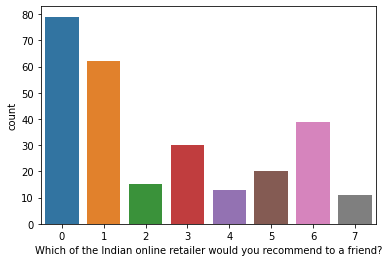

In [180]:
sns.countplot(x='Which of the Indian online retailer would you recommend to a friend?',data=df)
plt.show()

In [188]:
df['Which of the Indian online retailer would you recommend to a friend?'].unique


<bound method Series.unique of 0      6
1      3
2      5
3      1
4      3
      ..
264    0
265    6
266    0
267    0
268    0
Name: Which of the Indian online retailer would you recommend to a friend?, Length: 269, dtype: int32>

In [200]:
df.Which of the Indian online retailer would you recommend to a friend?.value_counts()

SyntaxError: invalid syntax (Temp/ipykernel_17672/811052952.py, line 1)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    int64 
 1   2 How old are you?                                                                                                                                                                    

In [203]:
df['Wild variety of product on offer'].unique

<bound method Series.unique of 0                                           Flipkart.com
1                               Flipkart.com, Myntra.com
2                                  Amazon.in, Myntra.com
3                                Amazon.in, Flipkart.com
4                                             Myntra.com
                             ...                        
264                                            Amazon.in
265                                            Amazon.in
266                                            Amazon.in
267    Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com
268                                            Amazon.in
Name: Wild variety of product on offer, Length: 269, dtype: object>

<AxesSubplot:>

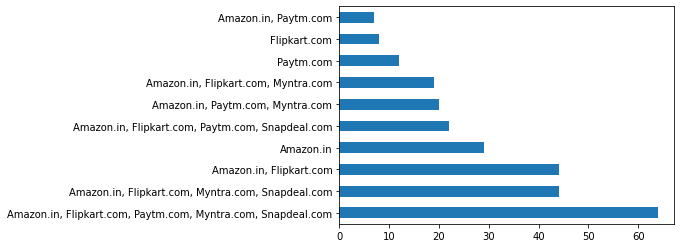

In [217]:
 df['Easy to use website or application'].value_counts().plot(kind='barh')

In [211]:
pd.options.display.max_columns = None

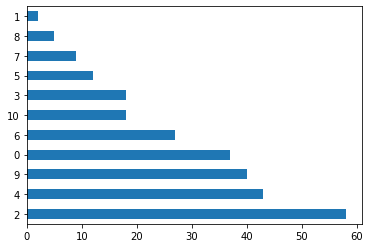

In [214]:
city = df['3 Which city do you shop online from?'].value_counts().plot(kind='barh')

In [189]:
X=df.drop('Which of the Indian online retailer would you recommend to a friend?',axis=1)
y=df['Which of the Indian online retailer would you recommend to a friend?']

In [190]:
from sklearn.feature_selection import SelectKBest,f_classif

KeyError: 'Which of the Indian online retailer would you recommend to a friend?'

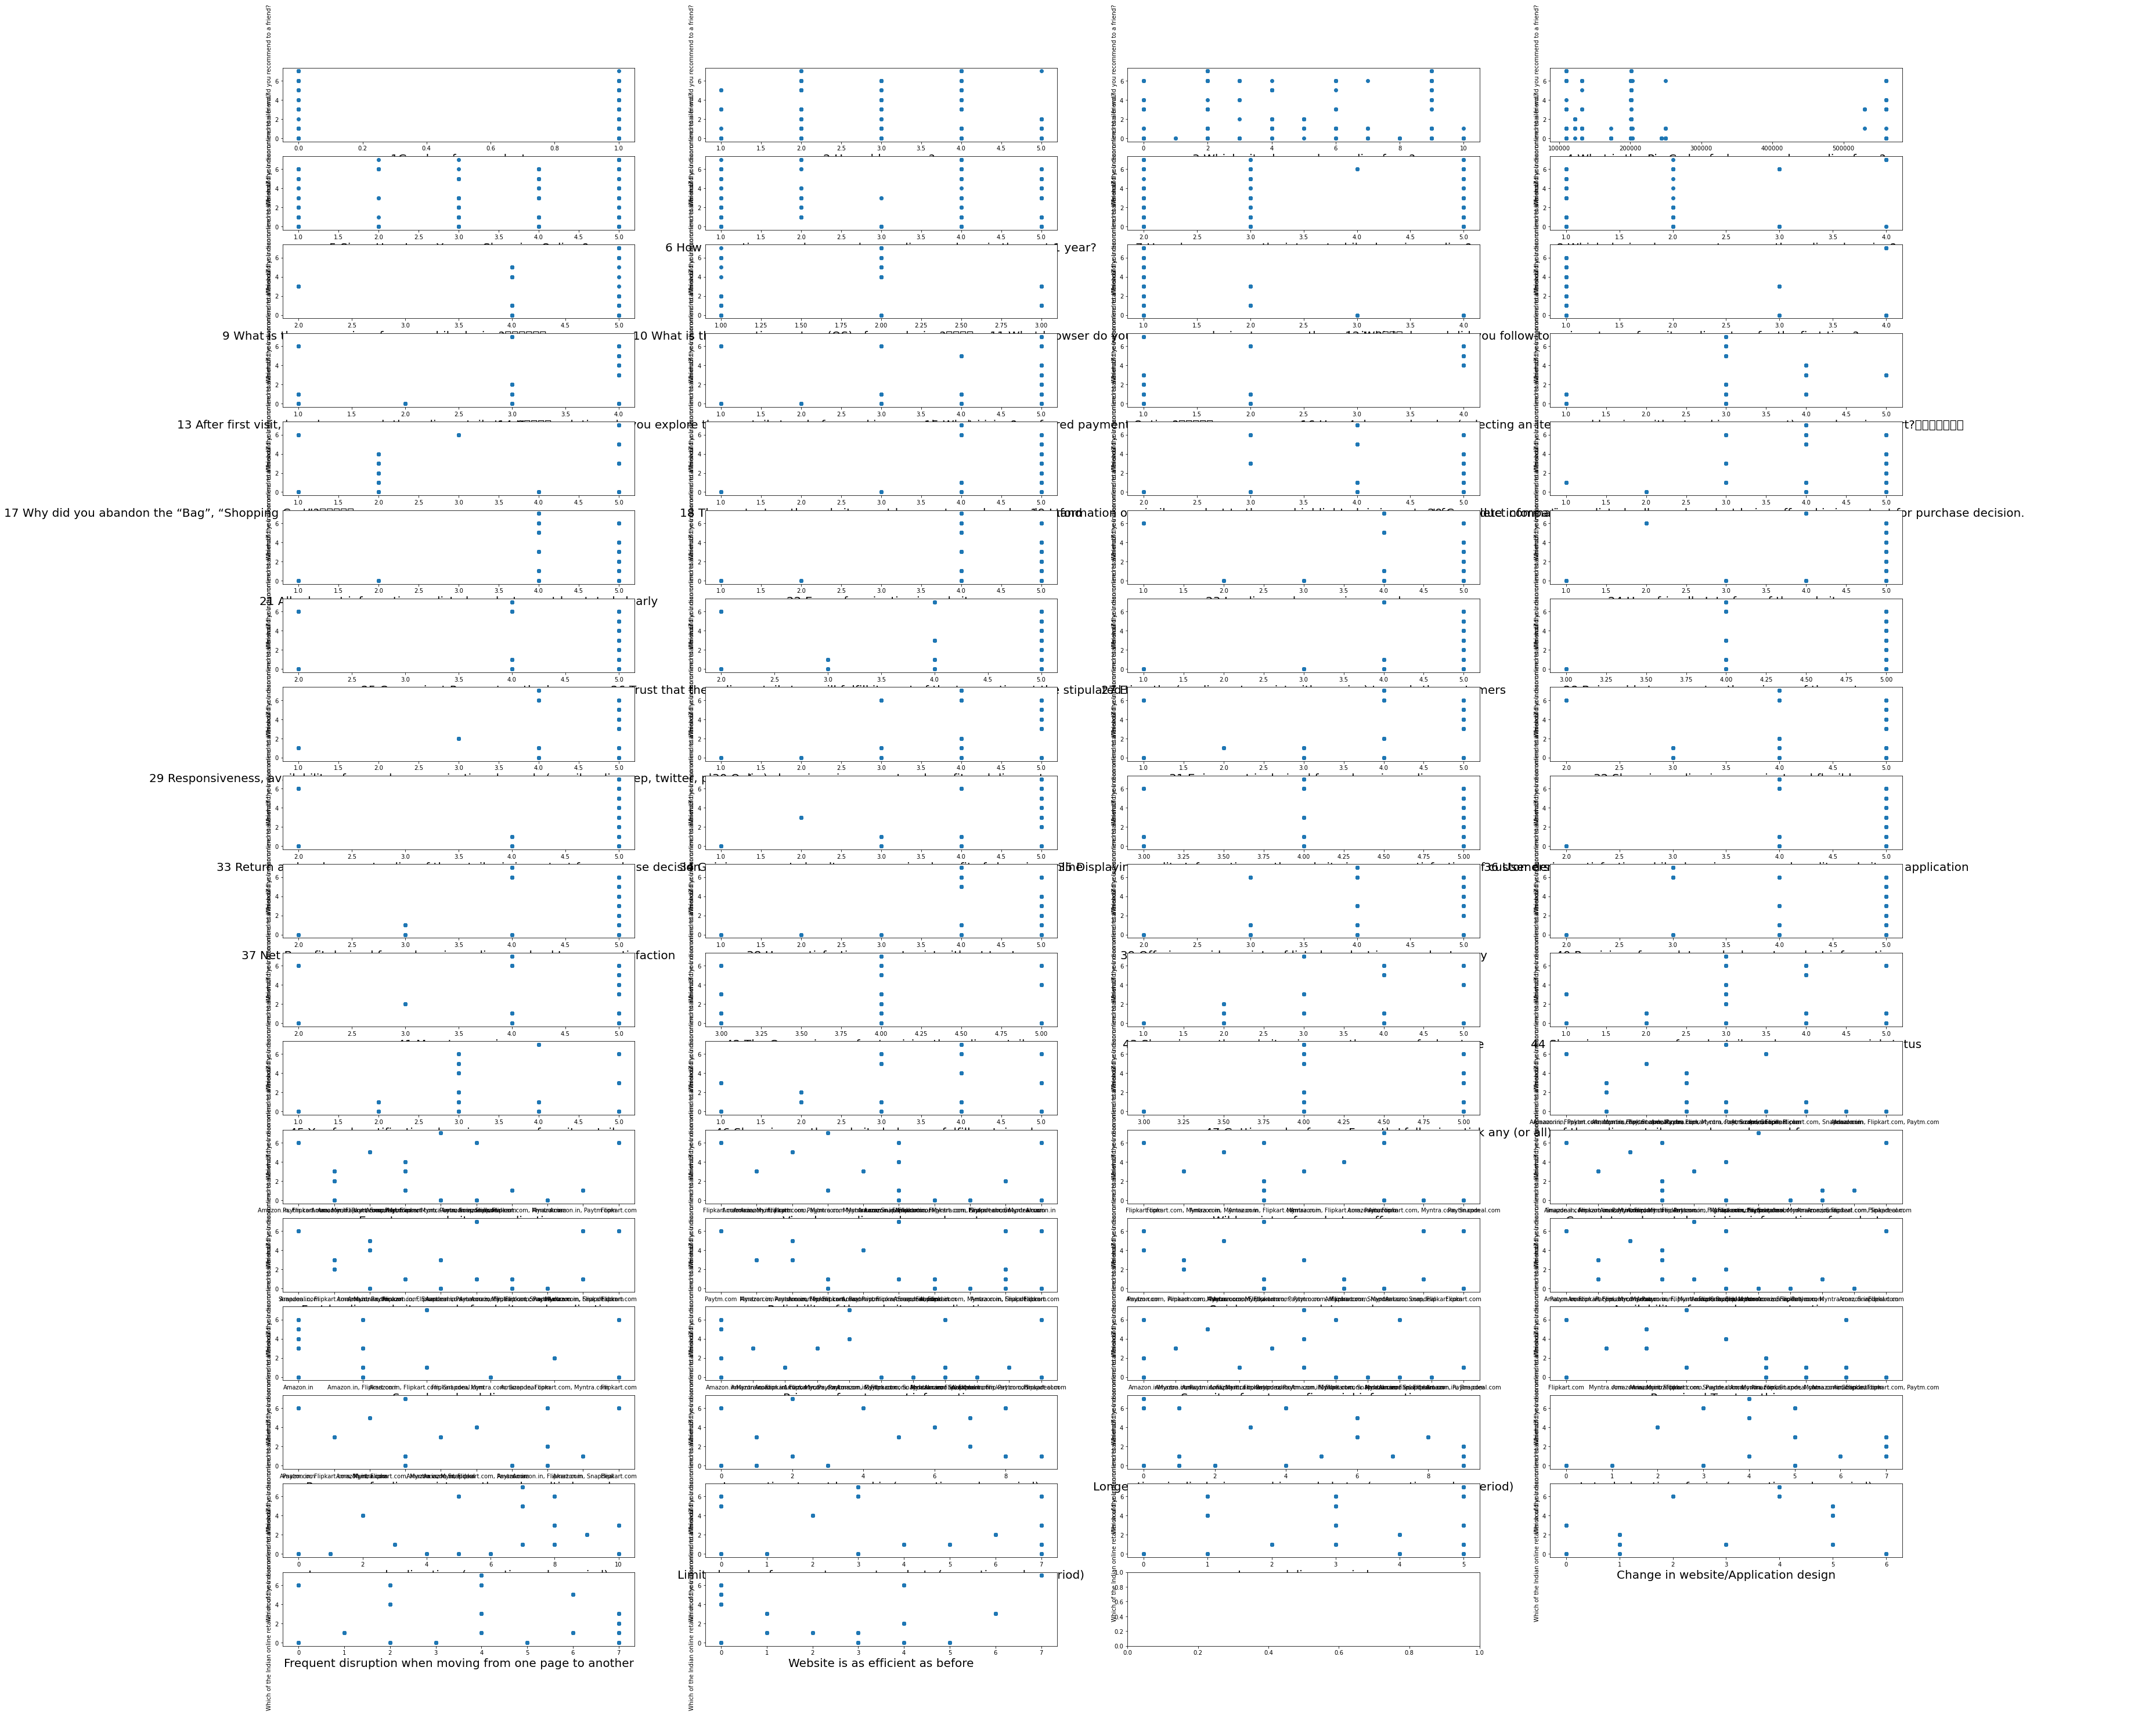

In [193]:
plt.figure(figsize=(50,50))
plotnumber=1
for column in df:
    if plotnumber<=71:
        ax=plt.subplot(18,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Which of the Indian online retailer would you recommend to a friend?')
        plotnumber+=1
plt.show()

In [ ]:
best_features=SelectKBest(score_func=f_classif,k=30)
fit=best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['feature_name','Score']
print(feature_scores.nlargest(30,'Score'))